# AdaBoost

Изучите и реализуйте алгоритм адаптивного бустинга для задачи классификации с экспоненциальной функцией потерь (AdaBoost). \
В качестве базового алгоритма используйте дерево решений. \
Изобразите, как алгоритм классифицирует всё пространство после 1, 2, 3, 5, 8, 13, 21, 34 и 55 шага бустинга. \
Постройте график зависимости качества от номера шага. В качества функции качества используйте accuracy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from math import log, exp

## Подготовка данных

In [2]:
def make_num_labels(x):
    if x[2] == "P":
        x[2] = 1
    else:
        x[2] = -1
    return x

In [3]:
def get_prepared_data_from_csv(filename):
    dfolder = "data/"
    
    data = pd.read_csv(dfolder + filename)

    vals = np.array(list(map(make_num_labels, data.values)))
    
    return vals[:, :2], vals[:, -1].astype('int')

In [4]:
chips_x, chips_y = get_prepared_data_from_csv("chips.csv")

In [5]:
geyser_x, geyser_y = get_prepared_data_from_csv("geyser.csv")

## AdaBoost

In [6]:
class Boosting:
    
    def __init__(
        self,
        base_clf = DecisionTreeClassifier(max_depth=5)
    ):
        self.base_clf = base_clf
        self.sample_weight = []
        self.alphas = []
        self.clfs = []
        self.accs = []
        
    def fit_model_with_boost(self, X: np.ndarray, y: np.ndarray, n_iter: int):
        n = len(X)
        self.sample_weight = [1/n for i in range(n)]
        self.alphas = []
        self.clfs = []
        self.accs = []
        
        for i in range(n_iter):
            self.base_clf.fit(X, y, sample_weight = self.sample_weight)
            y_pred = self.base_clf.predict(X)
        
            q = sum([self.sample_weight[i] if (y_pred[i] - y[i]) != 0 else 0 for i in range(n)])
        
            alpha = 0.5 * log((1 - q)/q)
        
            self.sample_weight = [self.sample_weight[i]*exp(-alpha*y[i]*y_pred[i]) for i in range(n)]
        
            sum_weight = sum(self.sample_weight)
            self.sample_weight = [self.sample_weight[i]/sum_weight for i in range(n)]
        
            self.alphas.append(alpha)
            self.clfs.append(self.base_clf)
            self.accs.append(accuracy_score(y, y_pred))
            
        
    def predict(self, X: np.ndarray):
        return np.sign(sum([self.alphas[i]*self.clfs[i].predict(X) for i in range(len(self.alphas))]))
    
    def get_accs(self):
        return self.accs

## Графики

In [7]:
def show_clf_plot(X, y, n_iter, chips=True):
    boost = Boosting()
    boost.fit_model_with_boost(X, y, n_iter)
    
    min_xx = min(X[:, 0])
    max_xx = max(X[:, 0])
    diff_xx = max_xx - min_xx
    min_yx = min(X[:, 1])
    max_yx = max(X[:, 1])
    diff_yx = max_yx - min_yx
    
    all_x = np.array([[min_xx + i*(diff_xx/100), min_yx + j*(diff_yx/100)] for j in range(1, 100) for i in range(1, 100)])
    all_y = boost.predict(all_x)
    
    plt.scatter(*all_x[all_y == 1].T, color="lightgreen", alpha=0.3)
    plt.scatter(*all_x[all_y == -1].T, color="salmon", alpha=0.3)
    
    plt.scatter(*X[y == -1].T, color="darkred", s=18, marker="x")
    plt.scatter(*X[y == 1].T, color="darkgreen", s=18, marker="+")
    
    if chips:
        plt.title("Chips boosting clf with " + str(n_iter) + " iterations")
    else:
        plt.title("Geyser boosting clf with " + str(n_iter) + " iterations")
    plt.show()

In [8]:
iters = [1, 2, 3, 5, 8, 13, 21, 34, 55]

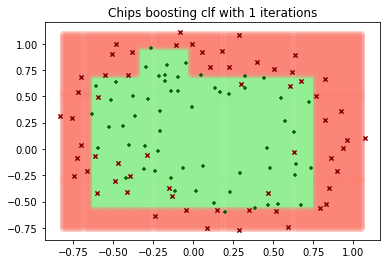

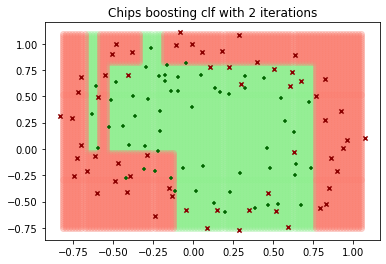

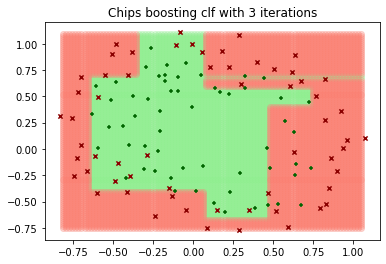

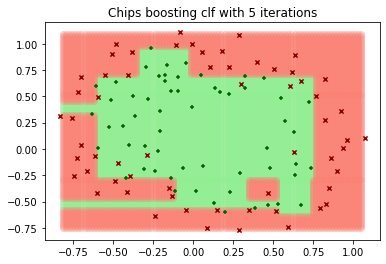

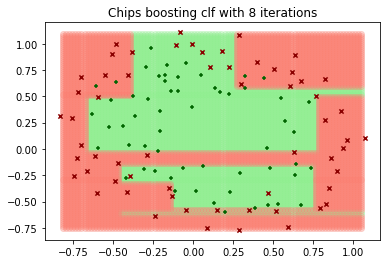

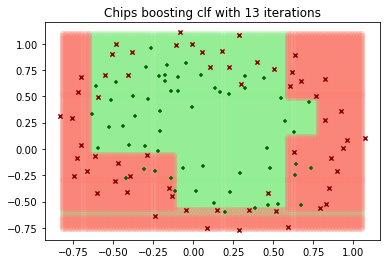

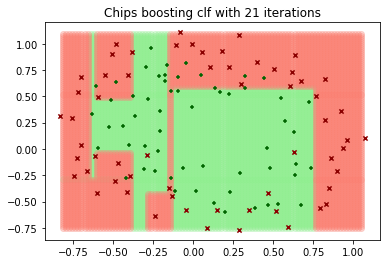

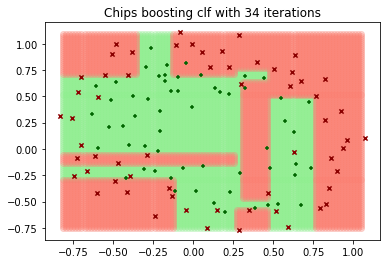

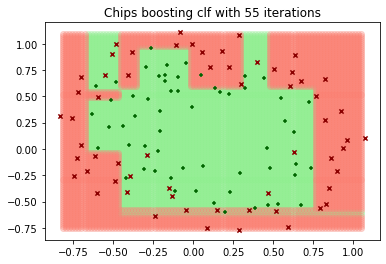

In [9]:
for it in iters:
    show_clf_plot(chips_x, chips_y, it)

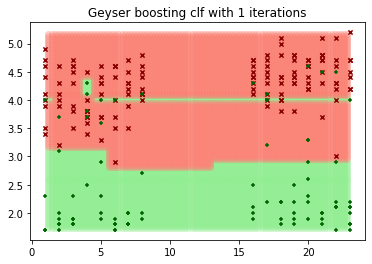

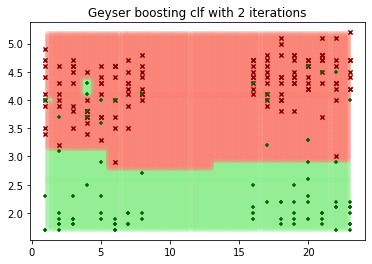

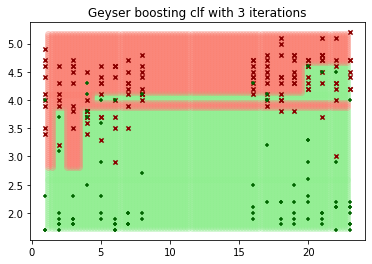

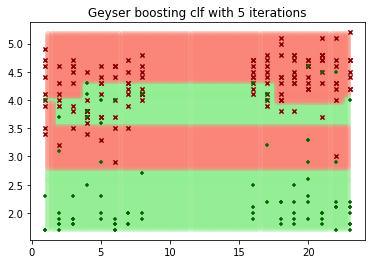

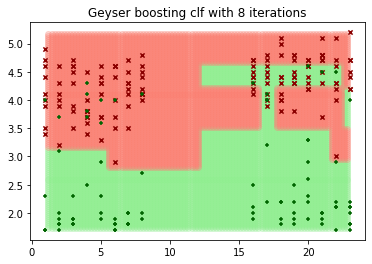

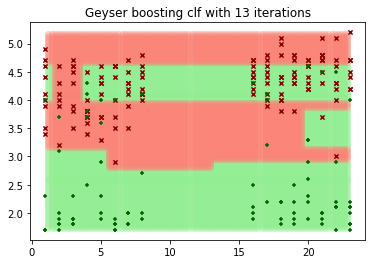

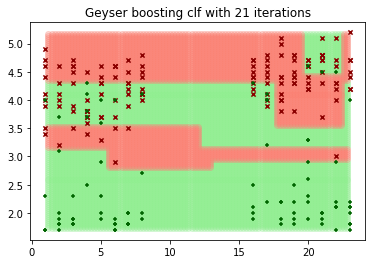

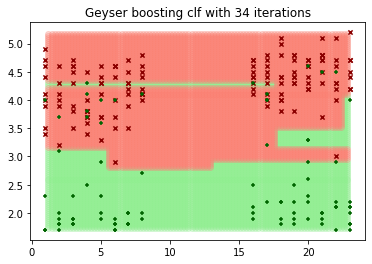

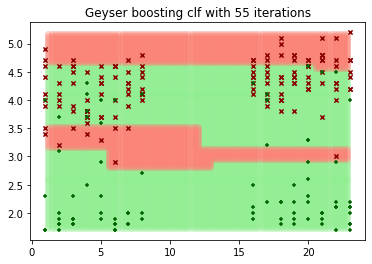

In [10]:
for it in iters:
    show_clf_plot(geyser_x, geyser_y, it, False)

In [11]:
def show_accuracy_plot(X, y, n, chips=True):
    boost = Boosting()
    boost.fit_model_with_boost(X, y, n)
    
    x = np.arange(1, n+1, 1)
    plt.plot(x, boost.get_accs())
    plt.xlabel("Iterations")
    plt.ylabel("Accuracies")
    if chips:
        plt.title("Chips accuracies")
    else:
        plt.title("Geyser accuracies")
    plt.show()

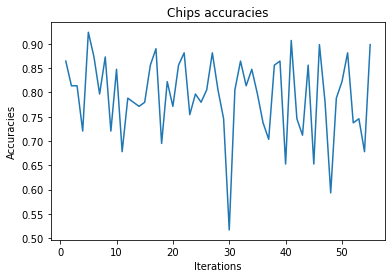

In [12]:
show_accuracy_plot(chips_x, chips_y, 55)

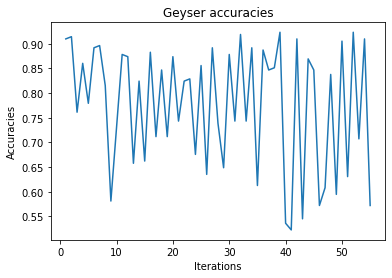

In [13]:
show_accuracy_plot(geyser_x, geyser_y, 55, False)